# NBA Season Stats 2018 - 2019

# Milestone 4: Missing Data and Distribution Plots

1. Use describe() or any other method to see if there is missing data. Add a sentence or short paragraph on your webpage that either states there is no missing data, or describes how much of the data is missing.

2. For 4 different columns, do the following for each column:
   - Plot the distribution of data in that column. The best plot type is probably a bar chart or histogram, but you are welcome to experiment with other plots. The plot should only contain data from that column.
   - Add a title and axes labels to the plot.
   - Add the plot to your webpage, with a few sentences pointing out any interesting featurs in the plot (ex. does the distribution look normal, are there outliers, what are the most likely data values). You can also include opinions here, such as if you are surprised by some aspect of the distribution.

3. Add your Jupyter notebook containing your code to GitHub. It is fine if your notebook also contains notes about the results.

________

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from scipy.special import expit
from scipy.stats import logistic
import numpy as np
from sklearn import tree
import graphviz
from graphviz import Source 
from sklearn.tree import export_graphviz
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold
import folium
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import folium

%matplotlib inline

In [3]:
nba = pd.read_csv("nbastats2018-2019.csv")
pd.set_option('display.max_columns', None)

In [4]:
nba

,Name,Height,Weight,Team,Age,Salary,Points,Blocks,Steals,Assists,Rebounds,FT%,FTA,FG3%,FG3A,FG%,FGA,MP,G,PER,OWS,DWS,WS,WS48,USG,BPM,VORP
0,Alex Abrines,78,200,Oklahoma City Thunder,25,5455236,5.3,0.2,0.5,0.6,1.5,0.923,0.4,0.323,4.1,0.357,5.1,19.0,31,6.3,0.1,0.6,0.6,0.053,12.2,-3.4,-0.2
1,Quincy Acy,79,240,Phoenix Suns,28,213949,1.7,0.4,0.1,0.8,2.5,0.700,1.0,0.133,1.5,0.222,1.8,12.3,10,2.9,-0.1,0.0,-0.1,-0.022,9.2,-5.9,-0.1
2,Jaylen Adams,74,190,Atlanta Hawks,22,236854,3.2,0.1,0.4,1.9,1.8,0.778,0.3,0.338,2.2,0.345,3.2,12.6,34,7.6,-0.1,0.2,0.1,0.011,13.5,-4.4,-0.3
3,Steven Adams,84,265,Oklahoma City Thunder,25,24157304,13.9,1.0,1.5,1.6,9.5,0.500,3.7,0.000,0.0,0.595,10.1,33.4,80,18.5,5.1,4.0,9.1,0.163,16.4,2.7,3.2
4,Bam Adebayo,82,255,Miami Heat,21,2955840,8.9,0.8,0.9,2.2,7.3,0.735,2.8,0.200,0.2,0.576,5.9,23.3,82,17.9,3.4,3.4,6.8,0.171,15.8,3.0,2.4
5,Deng Adel,79,200,NaN,21,-,1.7,0.2,0.1,0.3,1.0,1.000,0.2,0.261,1.2,0.306,1.9,10.2,19,2.7,-0.2,0.0,-0.2,-0.054,9.9,-7.3,-0.3
6,LaMarcus Aldridge,83,260,San Antonio Spurs,33,22347015,21.3,1.3,0.5,2.4,9.2,0.847,5.1,0.238,0.5,0.519,16.3,33.2,81,22.9,6.4,2.9,9.3,0.167,26.9,1.6,2.5
7,Rawle Alkins,77,225,NaN,21,-,3.7,0.0,0.1,1.3,2.6,0.667,1.2,0.250,1.2,0.333,3.9,12.0,10,8.1,-0.1,0.0,-0.1,-0.042,19.0,-6.5,-0.1
8,Grayson Allen,77,198,Utah Jazz,23,2074320,5.6,0.2,0.2,0.7,0.6,0.750,1.6,0.323,2.6,0.376,4.7,10.9,38,7.5,-0.4,0.4,0.0,0.002,24.4,-6.8,-0.5
9,Jarrett Allen,83,237,Brooklyn Nets,20,2034120,10.9,1.5,0.5,1.4,8.4,0.709,3.5,0.133,0.6,0.590,7.1,26.2,80,18.5,4.4,3.3,7.6,0.175,15.9,2.5,2.4


Some data translates to "NaN" because the player either did not record a stat, was moved to a developmental team, or was cut before the end of the season.

In [5]:
nba.describe()

,Height,Weight,Age,Points,Blocks,Steals,Assists,Rebounds,FT%,FTA,FG3%,FG3A,FG%,FGA,MP,G,PER,OWS,DWS,WS,WS48,USG,BPM,VORP
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,499.000000,521.000000,489.000000,521.000000,519.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,78.971209,217.516315,25.900192,8.737236,0.397889,0.621497,1.948752,3.661804,0.735144,1.819386,0.312748,2.562956,0.445530,7.126104,19.598848,49.988484,13.247025,1.237236,1.155278,2.393858,0.079063,18.757582,-1.770058,0.577735
std,3.299932,23.522089,4.208236,6.085559,0.405794,0.412589,1.776774,2.527316,0.145222,1.641701,0.130766,2.096460,0.102037,4.574992,8.988803,25.626606,7.058072,1.854837,1.106543,2.742634,0.115215,5.593436,4.942094,1.330516
min,69.000000,166.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,1.000000,-38.100000,-2.800000,-0.500000,-1.700000,-0.946000,0.000000,-52.300000,-2.200000
25%,77.000000,200.000000,23.000000,4.200000,0.100000,0.300000,0.800000,1.900000,0.675000,0.700000,0.287000,0.900000,0.403500,3.700000,12.600000,29.000000,9.800000,0.000000,0.300000,0.300000,0.039000,15.000000,-3.700000,-0.100000
50%,79.000000,215.000000,25.000000,7.100000,0.300000,0.500000,1.300000,3.100000,0.759000,1.300000,0.335000,2.200000,0.440000,6.000000,19.300000,57.000000,12.800000,0.500000,0.900000,1.500000,0.085000,17.800000,-1.500000,0.100000
75%,82.000000,235.000000,29.000000,11.800000,0.500000,0.900000,2.500000,4.700000,0.822000,2.400000,0.371000,3.800000,0.491000,9.600000,27.200000,73.000000,16.600000,1.900000,1.700000,3.500000,0.123000,22.100000,0.500000,0.800000
max,87.000000,290.000000,42.000000,36.100000,2.700000,2.200000,10.700000,15.600000,1.000000,11.000000,1.000000,13.200000,1.000000,24.500000,36.900000,82.000000,80.400000,11.400000,5.900000,15.200000,1.261000,47.200000,14.900000,9.900000


In [6]:
nba.describe(include = ["O"])

,Name,Team,Salary
count,521,470,521
unique,521,30,333
top,Kadeem Allen,Phoenix Suns,-
freq,1,21,51


470 out of 521 Players on 30 different teams; 21 being the most players on a single team.

In [7]:
nba.loc[nba.Salary == "-", 'Salary'] = 0

nba["Salary"] = nba.Salary.astype(int)

In [8]:
nba.dtypes

Name         object
Height        int64
Weight        int64
Team         object
Age           int64
Salary        int64
Points      float64
Blocks      float64
Steals      float64
Assists     float64
Rebounds    float64
FT%         float64
FTA         float64
FG3%        float64
FG3A        float64
FG%         float64
FGA         float64
MP          float64
G             int64
PER         float64
OWS         float64
DWS         float64
WS          float64
WS48        float64
USG         float64
BPM         float64
VORP        float64
dtype: object

Text(0,0.5,'Frequency')

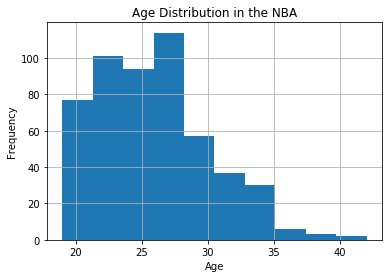

In [9]:
nba["Age"].hist(bins = 10)
plt.title("Age Distribution in the NBA")
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

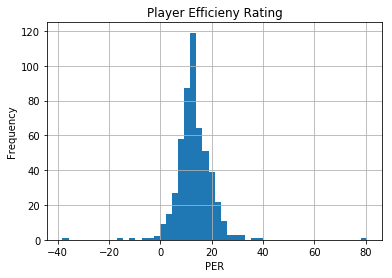

In [10]:
nba["PER"].hist(bins = 50)
plt.title("Player Efficieny Rating")
plt.xlabel("PER")
plt.ylabel("Frequency")

In [11]:
team_counts = nba['Team'].value_counts()
team_counts

Phoenix Suns              21
Atlanta Hawks             21
Los Angeles Clippers      19
New Orleans Pelicans      18
Brooklyn Nets             18
Indiana Pacers            17
Washington Wizards        17
Memphis Grizzlies         17
Philadelphia 76ers        17
Chicago Bulls             16
New York Knicks           16
Minnesota Timberwolves    16
Los Angeles Lakers        16
Cleveland Cavaliers       16
Orlando Magic             15
Golden State Warriors     15
Sacramento Kings          15
San Antonio Spurs         15
Detroit Pistons           15
Boston Celtics            15
Denver Nuggets            15
Dallas Mavericks          15
Utah Jazz                 15
Portland Trail Blazers    14
Charlotte Hornets         14
Milwaukee Bucks           14
Houston Rockets           13
Oklahoma City Thunder     12
Toronto Raptors           12
Miami Heat                11
Name: Team, dtype: int64

Text(0,0.5,'# of Players')

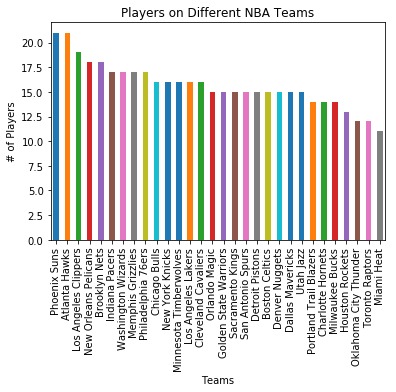

In [12]:
team_counts.plot.bar()
plt.title("Players on Different NBA Teams")
plt.xlabel("Teams")
plt.ylabel("# of Players")

Text(0,0.5,'# of Players')

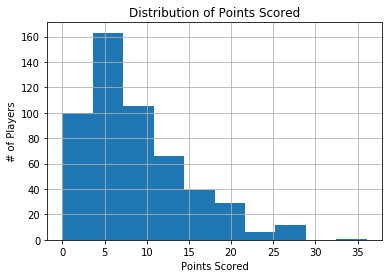

In [13]:
nba["Points"].hist(bins = 10)
plt.title("Distribution of Points Scored")
plt.xlabel("Points Scored")
plt.ylabel("# of Players")

Text(0,0.5,'Frequency')

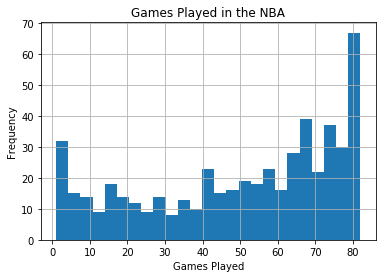

In [14]:
nba["G"].hist(bins = 25)
plt.title("Games Played in the NBA")
plt.xlabel("Games Played")
plt.ylabel("Frequency")

____

# Milestone 5: Outliers and Multi-Variable Plots

1. In the last milestone, you may have noticed some outliers in your dataset. If you would like to remove any:
    - filter your dataset to remove the outliers. You can either filter your dataset the same way each time your use it, or you can create a new .csv file using the command: filtered_df.to_csv("new_csv_file name.csv")
    - add a note on your webpage explaining what outliers you removed and why
    - redo any distribution plots from the previous milestone if they will look significantly different, and add the new plots to your webpage
    - add the code for filtering your data to GitHub
2. Make three different plots showing relationships between two or more of your columns:
    - use scatterplots or any other plot type
    - Add a title and axes labels to each plot
    - Add the plots to your webpage, with a few sentences pointing out any interesting featurs in each plot (ex. does the relationship look linear, what patterns do you see in the plot, etc). You can also include opinions here, such as if you are surprised by some aspect of the relationship.
3. Add your Jupyter notebook containing your code to GitHub. It is fine if your notebook also contains notes about the results.

# NOTE: Since the distribution of data plots did not show sufficient amount of outliers that would potential produce inaccuracies in the data, part 1 can be skipped. The outliers, in fact, help tell more of the story behind the data.

Text(0,0.5,'Player Efficiency Rating')

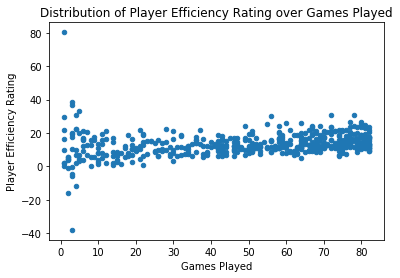

In [15]:
nba.plot.scatter(x = "G", y = "PER")
plt.title("Distribution of Player Efficiency Rating over Games Played")
plt.xlabel("Games Played")
plt.ylabel('Player Efficiency Rating')

Text(6.8,0.5,'Free Throws Made')

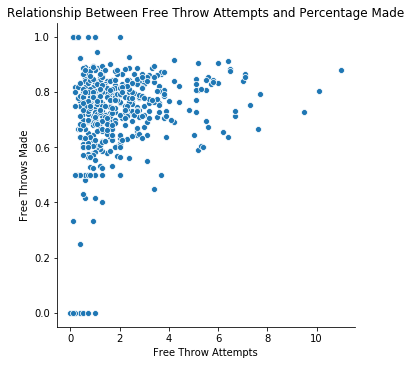

In [16]:
sns.relplot(x = "FTA", y = "FT%", data = nba)
plt.title("Relationship Between Free Throw Attempts and Percentage Made")
plt.xlabel("Free Throw Attempts")
plt.ylabel("Free Throws Made")

Text(1.675,0.5,'PER')

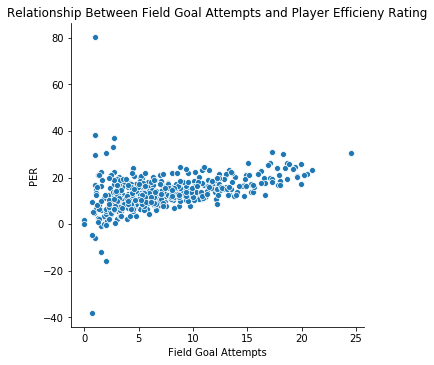

In [17]:
sns.relplot(x = "FGA", y = "PER", data = nba)
plt.title("Relationship Between Field Goal Attempts and Player Efficieny Rating")
plt.xlabel("Field Goal Attempts")
plt.ylabel("PER")

Text(1.675,0.5,'BPM')

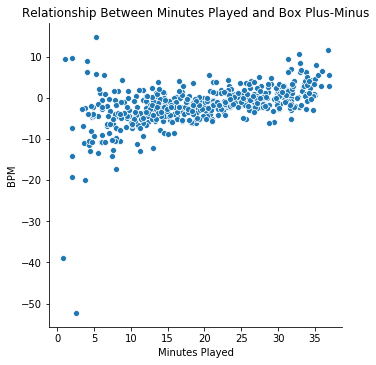

In [18]:
sns.relplot(x = "MP", y = "BPM", data = nba)
plt.title("Relationship Between Minutes Played and Box Plus-Minus")
plt.xlabel("Minutes Played")
plt.ylabel("BPM")

___

# Milestone 6: Linear or Logistic Regression

Choose a quantitative variable or categorical variable with two categories to predict using linear or logistic regression. For that variable:

- Compute the linear or logistic regression model using one or more of the other data columns as the independent variable(s)
- Assess the fit of the model using at least two different techniques (ex. plots of residuals; split data into testing and training data; computation of a measure like R-squared, mean squared error, sensitivity, specificity, etc.)
- Add a description of the model (including the equation) and the results of checking the model fit to your webpage, along with any relevant plots. Include whether you believe the models performs particularly well or poorly on any part of the data.
    
Add your Jupyter notebook containing your code to GitHub. It is fine if your notebook also contains notes about the results.

Text(0,0.5,'PER')

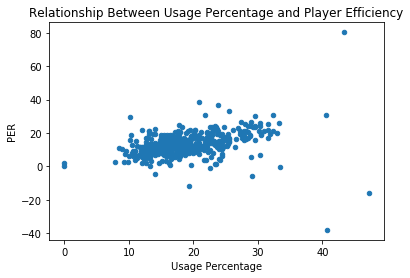

In [19]:
nba.plot.scatter(x = "USG", y = "PER")
plt.title("Relationship Between Usage Percentage and Player Efficiency")
plt.xlabel("Usage Percentage")
plt.ylabel("PER")

In [20]:
lm = smf.ols("PER ~ USG", nba).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PER   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     74.86
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           6.36e-17
Time:                        21:56:54   Log-Likelihood:                -1721.8
No. Observations:                 521   AIC:                             3448.
Df Residuals:                     519   BIC:                             3456.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8435      1.013      4.779      0.000       2.852       6.834
USG            0.4480      0.052      8.652      0.000       0.346       0.550
==============================================================================
Omnibus:                      215.167   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15919.907
Skew:                          -0.881   Prob(JB):                         0.00
Kurtosis:                      30.023   Cond. No.                         68.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'PER (Player Efficiency Rating)')

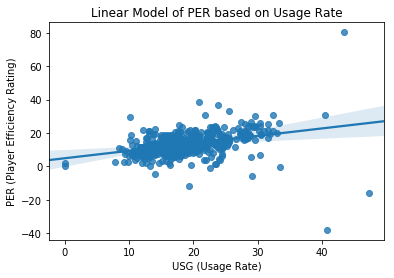

In [21]:
sns.regplot(y = "PER", x = "USG", data = nba, fit_reg = True)
plt.title("Linear Model of PER based on Usage Rate")
plt.xlabel("USG (Usage Rate)")
plt.ylabel("PER (Player Efficiency Rating)")

In [22]:
lm.resid

0      -4.009172
1      -6.065146
2      -3.291583
3       6.309192
4       5.977997
5      -6.578752
6       6.005101
7      -5.255631
8      -8.274877
9       6.533196
10      2.575564
11      2.218815
12     -1.349215
13      2.311625
14    -23.880518
15     11.585855
16    -15.823661
17     -3.127643
18     -1.987600
19      1.514833
20     -0.280410
21      3.150785
22      6.158750
23     -0.670011
24      3.214725
25     -5.837934
26    -13.982068
27     -0.714812
28      2.081980
29     -1.132509
         ...    
491     1.795586
492     1.286738
493    -2.823553
494    -8.622003
495     3.326781
496     2.413067
497     2.026781
498   -15.660388
499     8.531538
500    -3.374877
501    16.632313
502    -2.001981
503     2.909192
504    -0.653973
505     1.841054
506     1.081205
507     9.342045
508    -1.063596
509    -0.994791
510    -1.362046
511     5.363508
512     2.547577
513    -0.283618
514    -8.233176
515     3.292378
516    -0.566912
517     5.053993
518     3.4515

Text(0,0.5,'Frequency of Residuals')

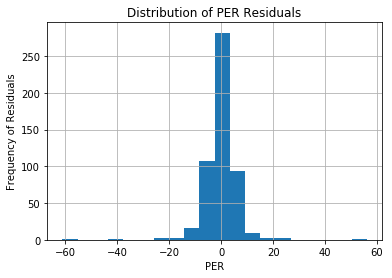

In [23]:
lm.resid.hist(bins = 20)
plt.title("Distribution of PER Residuals")
plt.xlabel("PER")
plt.ylabel("Frequency of Residuals")

In [24]:
lm.fittedvalues

0      10.309172
1       8.965146
2      10.891583
3      12.190808
4      11.922003
5       9.278752
6      16.894899
7      13.355631
8      15.774877
9      11.966804
10     13.624436
11     10.981185
12     12.549215
13     10.488375
14     17.880518
15     19.314145
16     14.923661
17     14.027643
18     11.787600
19     10.085167
20     12.280410
21     12.549215
22     14.341250
23     12.370011
24     15.685275
25      8.337934
26     15.282068
27     12.414812
28     12.818020
29     17.432509
         ...    
491    12.504414
492    15.013262
493     9.323553
494    11.922003
495    12.773219
496    18.686933
497    12.773219
498    11.160388
499    14.968462
500    15.774877
501    16.267687
502    10.801981
503    12.190808
504    10.353973
505    19.358946
506    11.518795
507     9.457955
508    11.563596
509    11.294791
510    14.162046
511    16.536492
512    12.952423
513    12.683618
514    10.533176
515    12.907622
516    17.566912
517    12.146007
518    13.8484

Text(0.5,1,'PER vs Predicted PER')

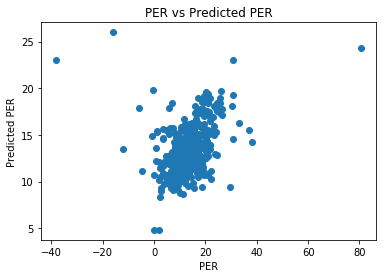

In [25]:
plt.scatter(nba['PER'], lm.fittedvalues)
plt.xlabel("PER")
plt.ylabel("Predicted PER")
plt.title("PER vs Predicted PER")

Using Plot of Residuals, it looks like PER was predicted correctly due to the fact that there are not many outliers in this output. In addition, the histogram of the residuals is similar to that of a normal distribution. Therefore, the linear model is a good fit. In this case, the outliers serve to show the handful of players who played very little to an insufficient amount of games that cause their PER to only be a reflection of thier minimal contribution to the game(USG). Zing on the Rockets is a perfect example of a player possessing a very high PER (~80) yet only playing less than 5 games.

In [26]:
lm = smf.ols("PER ~ USG", nba).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PER   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     74.86
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           6.36e-17
Time:                        21:56:57   Log-Likelihood:                -1721.8
No. Observations:                 521   AIC:                             3448.
Df Residuals:                     519   BIC:                             3456.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8435      1.013      4.779      0.000       2.852       6.834
USG            0.4480      0.052      8.652      0.000       0.346       0.550
==============================================================================
Omnibus:                      215.167   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15919.907
Skew:                          -0.881   Prob(JB):                         0.00
Kurtosis:                      30.023   Cond. No.                         68.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Equation for Linear Model: y = 4.8435 + 0.4480x

R-Squared: 0.126

In [27]:
new_data = pd.DataFrame({'USG' : [30]})
new_data

,USG
0,30


In [28]:
lm.predict(new_data)

0    18.283726
dtype: float64

In [29]:
4.8435 + 0.4480*30

18.2835

In [30]:
lower_usage = pd.DataFrame({'USG' : [20,22,25]})
lower_usage

,USG
0,20
1,22
2,25


In [31]:
lm.predict(lower_usage)

0    13.803639
1    14.699656
2    16.043682
dtype: float64

___

# Milestone 7: Decision Trees

Use decision tree classifier or regressor to predict the same categorical or quantitative variable that you predicted in Milestone 6. You should split your data into training and testing data for this milestone.
- Add the graph of the decision tree model based on the training data to your webpage.
- Use the testing data to make predictions and assess your model. If classifying, compute the confusion matrix and at least two of sensitivity, specificity, precision, or accuracy. If regressing, compute the mean squared error and plot the actual value (x axis) vs. the error or predicted value (y axis).
- Write a few sentences on your webpage summarizing the model (what does it appear to be basing its decisions on) and how well it performs.

Add your Jupyter notebook containing your code to GitHub. It is fine if your notebook also contains notes about the results.

In [51]:
X = nba.iloc[:,[4, 24]]
X.head()

,Age,USG
0,25,12.2
1,28,9.2
2,22,13.5
3,25,16.4
4,21,15.8


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, nba["PER"], test_size = 0.2)

In [53]:
reg = tree.DecisionTreeRegressor(max_depth = 5)
reg = reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [54]:
((y_pred - y_test)**2).mean()

131.71131074120646

In [57]:
nba_data = tree.export_graphviz(reg, out_file=None) 
graph = graphviz.Source(nba_data) 
graph.render("nbastats2018-2019.dot")

PermissionError: [Errno 13] Permission denied

In [58]:
mses = []
for d in range(2,26):
    reg = tree.DecisionTreeRegressor(max_depth = d)
    reg = reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    mse = ((y_test - y_pred)**2).mean()
    mses.append(mse)

Text(0,0.5,'Mean Squared Error')

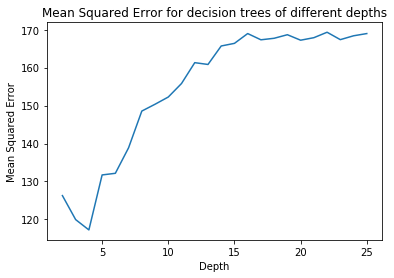

In [59]:
plt.plot(range(2,26),mses)
plt.title("Mean Squared Error for decision trees of different depths")
plt.xlabel("Depth")
plt.ylabel("Mean Squared Error")

___

# Milestone 8: K-Nearest Neighbors

Use the k-nearest neighbor classifier or regressor to predict the same categorical or quantitative variable that you predicted in Milestone 6 and 7. You should split your data into training and testing data for this milestone.

- Use the testing data to make predictions and assess your model. If classifying, compute the confusion matrix and at least two of sensitivity, specificity, precision, or accuracy. If regressing, compute the mean squared error and plot the actual value (x axis) vs. the error or predicted value (y axis).
- Write a few sentences on your webpage summarizing the model (what does it appear to be basing its decisions on) and how well it performs.
    
Add your Jupyter notebook containing your code to GitHub. It is fine if your notebook also contains notes about the results.

In [60]:
ik3nn = KNeighborsRegressor(n_neighbors = 3)
ik3nn.fit(X_train, y_train)
iy_pred = ik3nn.predict(X_test)

In [76]:
((y_test - iy_pred)**2).mean()

50.6731746031746

In [62]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [64]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

/home/joel.tavarez1/.local/lib/python3.4/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.08695652, 0.23732719],
       [0.52173913, 0.46543779],
       [0.17391304, 0.25576037],
       [0.60869565, 0.28801843],
       [0.        , 0.52534562],
       [0.60869565, 0.4516129 ],
       [0.26086957, 0.29493088],
       [0.47826087, 0.34562212],
       [0.56521739, 0.74654378],
       [0.17391304, 0.40092166],
       [0.26086957, 0.33870968],
       [0.43478261, 0.4516129 ],
       [0.39130435, 0.64516129],
       [0.08695652, 0.54608295],
       [0.2173913 , 0.4124424 ],
       [0.04347826, 0.34792627],
       [0.26086957, 0.55760369],
       [0.60869565, 0.4516129 ],
       [0.17391304, 0.38709677],
       [0.39130435, 0.7718894 ],
       [0.17391304, 0.56682028],
       [0.47826087, 0.66820276],
       [0.30434783, 0.32949309],
       [0.39130435, 0.29262673],
       [0.30434783, 0.34101382],
       [0.52173913, 0.30184332],
       [0.39130435, 0.359447  ],
       [0.08695652, 0.39631336],
       [0.13043478, 0.30414747],
       [0.2173913 , 0.33640553],
       [0.

In [68]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

/home/joel.tavarez1/.local/lib/python3.4/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.42105263, 1.        ],
       [0.05263158, 0.53389831],
       [0.31578947, 0.49788136],
       [0.15789474, 0.40466102],
       [0.36842105, 0.54025424],
       [0.52631579, 0.47881356],
       [0.68421053, 0.50211864],
       [0.52631579, 0.44279661],
       [0.10526316, 0.35169492],
       [0.52631579, 0.47457627],
       [0.47368421, 0.59533898],
       [0.15789474, 0.40254237],
       [0.15789474, 0.44067797],
       [0.36842105, 0.47245763],
       [0.57894737, 0.39194915],
       [0.26315789, 0.3940678 ],
       [0.42105263, 0.37288136],
       [0.36842105, 0.29872881],
       [0.47368421, 0.4809322 ],
       [0.31578947, 0.37288136],
       [0.10526316, 0.37288136],
       [0.        , 0.40466102],
       [0.42105263, 0.40889831],
       [0.57894737, 0.46610169],
       [0.68421053, 0.46822034],
       [0.10526316, 0.28389831],
       [0.15789474, 0.27118644],
       [0.21052632, 0.51694915],
       [0.31578947, 0.34745763],
       [0.42105263, 0.29872881],
       [0.

In [77]:
knn_scaled = KNeighborsRegressor(n_neighbors = 3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

In [78]:
((y_test - y_pred_scaled)**2).mean()

56.49193650793652

In [79]:
knn_mses = []
for k in range(1,21):
    knn_scaled = KNeighborsRegressor(n_neighbors = k)
    knn_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = knn_scaled.predict(X_test_scaled)
    mse = ((y_test - y_pred_scaled)**2).mean()
    knn_mses.append(mse)

Text(0,0.5,'Mean Squared Error')

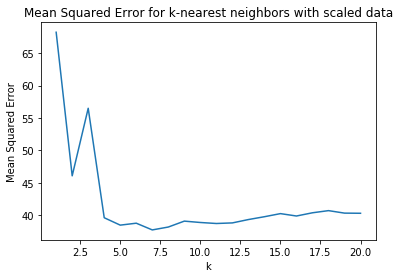

In [80]:
plt.plot(range(1,21),knn_mses)
plt.title("Mean Squared Error for k-nearest neighbors with scaled data")
plt.xlabel("k")
plt.ylabel("Mean Squared Error")

In [81]:
knn_mses

[68.23133333333334,
 46.063738095238094,
 56.49193650793652,
 39.59128571428572,
 38.450251428571434,
 38.749806878306885,
 37.71221379980564,
 38.15778869047619,
 39.06925690770135,
 38.858946666666675,
 38.70276584022039,
 38.79454563492063,
 39.31277768385461,
 39.74948542274053,
 40.22847534391535,
 39.8597890625,
 40.3573007085187,
 40.68961904761905,
 40.30470360110804,
 40.28199928571428]

___

# Milestone 9: Your Choice

Choose any analysis that is appropriate for your data, like a choropleth map, a contingency table, clustering, principal components analysis, or prediction of another variable than the one used for previous milestones.

Add the results of your analysis to your webpage, along with a description of what you did and how to interpret the results.

Add your Jupyter notebook containing your code to GitHub. It is fine if your notebook also contains notes about the results.

In [87]:
m = folium.Map(location = [37.0902, -95.7129])
m

In [93]:
folium.Marker([40.7505, -73.9934], 
              popup='Madison Square Garden', 
              tooltip="New York Knicks",
              icon=folium.Icon(color='orange')
             ).add_to(m)

In [94]:
folium.Marker([25.7814, -80.1870], 
              popup='American Airlines Arena', 
              tooltip="Miami Heat",
              icon=folium.Icon(color='red')
             ).add_to(m)

In [95]:
folium.Marker([32.7905, -96.8104], 
              popup='American Airlines Center', 
              tooltip="Dallas Mavericks",
              icon=folium.Icon(color='blue')
             ).add_to(m)

In [96]:
folium.Marker([28.5392, -81.3839], 
              popup='Amway Center', 
              tooltip="Orlando Magic",
              icon=folium.Icon(color='blue')
             ).add_to(m)

In [97]:
folium.Marker([29.4271, -98.4375], 
              popup='AT&T Center', 
              tooltip="San Antonio Spurs",
              icon=folium.Icon(color='grey')
             ).add_to(m)

In [98]:
folium.Marker([39.7639, -86.1555], 
              popup='Bankers Life Fieldhouse', 
              tooltip="Indiana Pacers",
              icon=folium.Icon(color='yellow')
             ).add_to(m)

In [99]:
folium.Marker([40.6826, -73.9754], 
              popup='Barclays Center', 
              tooltip="Brooklyn Nets",
              icon=folium.Icon(color='black')
             ).add_to(m)

In [100]:
folium.Marker([38.8981, -77.0208], 
              popup='Capital One Arena', 
              tooltip="Washington Wizards",
              icon=folium.Icon(color='red')
             ).add_to(m)

In [101]:
folium.Marker([37.7679, -122.3873], 
              popup='Chase Center', 
              tooltip="Golden State Warriors",
              icon=folium.Icon(color='yellow')
             ).add_to(m)

In [102]:
folium.Marker([35.4634, -97.5151], 
              popup='Chesapeske Energy Arena', 
              tooltip="Oklahoma City Thunder",
              icon=folium.Icon(color='orange')
             ).add_to(m)

In [103]:
folium.Marker([35.1382, -90.0505], 
              popup='FedExForum', 
              tooltip="Memphis Grizzlies",
              icon=folium.Icon(color='blue')
             ).add_to(m)

In [104]:
folium.Marker([43.0451, -87.9174], 
              popup='Fiserv Forum', 
              tooltip="Milwaukee Bucks",
              icon=folium.Icon(color='green')
             ).add_to(m)

In [105]:
folium.Marker([38.5802, -121.4997], 
              popup='Golden 1 Center', 
              tooltip="Sacramento Kings",
              icon=folium.Icon(color='blue')
             ).add_to(m)

In [106]:
folium.Marker([42.3410, -83.0550], 
              popup='Little Caesars Arena', 
              tooltip="Detroit Pistons",
              icon=folium.Icon(color='red')
             ).add_to(m)

In [107]:
folium.Marker([45.5316, -122.6668], 
              popup='Moda Center', 
              tooltip="Portland Trailblazers",
              icon=folium.Icon(color='red')
             ).add_to(m)

In [108]:
folium.Marker([39.7487, -105.0077], 
              popup='Pepsi Center', 
              tooltip="Denver Nuggets",
              icon=folium.Icon(color='yellow')
             ).add_to(m)

In [109]:
folium.Marker([41.4965, -81.6882], 
              popup='Rocket Mortgage FieldHouse', 
              tooltip="Cleaveland Cavaliers",
              icon=folium.Icon(color='brown')
             ).add_to(m)

In [110]:
folium.Marker([43.6435, -79.3791], 
              popup='Scotiabank Arena', 
              tooltip="Toronto Raptors",
              icon=folium.Icon(color='red')
             ).add_to(m)

In [111]:
folium.Marker([29.9490, -90.0821], 
              popup='Smoothie King Center', 
              tooltip="New Orleans Pelicans",
              icon=folium.Icon(color='blue')
             ).add_to(m)

In [112]:
folium.Marker([35.2252, -80.8393], 
              popup='Spectrum Center', 
              tooltip="Charlotte Hornets",
              icon=folium.Icon(color='blue')
             ).add_to(m)

In [113]:
folium.Marker([34.0430, -118.2673], 
              popup='Staples Center', 
              tooltip="Los Angeles Lakers / Los Angeles Clippers",
              icon=folium.Icon(color='yellow')
             ).add_to(m)

In [114]:
folium.Marker([33.7573, -84.3963], 
              popup='State Farm Arena', 
              tooltip="Atlanta Hawks",
              icon=folium.Icon(color='red')
             ).add_to(m)

In [115]:
folium.Marker([33.4457, -112.0712], 
              popup='Talking Stick Resort Arena', 
              tooltip="Phoenix Suns",
              icon=folium.Icon(color='orange')
             ).add_to(m)

In [116]:
folium.Marker([44.9793, -93.2757], 
              popup='Target Center', 
              tooltip="Minnesota Timberwolves",
              icon=folium.Icon(color='blue')
             ).add_to(m)

In [117]:
folium.Marker([42.3662, -71.0621], 
              popup='TD Garden', 
              tooltip="Boston Celtics",
              icon=folium.Icon(color='green')
             ).add_to(m)

In [118]:
folium.Marker([29.7508, -95.3621], 
              popup='Toyota Center', 
              tooltip="Houston Rockets",
              icon=folium.Icon(color='red')
             ).add_to(m)

In [119]:
folium.Marker([41.8807, -87.6742], 
              popup='United Center', 
              tooltip="Chicago Bulls",
              icon=folium.Icon(color='red')
             ).add_to(m)

In [120]:
folium.Marker([40.7683, -111.9011], 
              popup='Vivint Smart Home Arena', 
              tooltip="Utah Jazz",
              icon=folium.Icon(color='blue')
             ).add_to(m)

In [121]:
folium.Marker([39.9012, -75.1720], 
              popup='Wells Fargo Center', 
              tooltip="Philadelphia 76ers",
              icon=folium.Icon(color='blue')
             ).add_to(m)

In [122]:
m